# Evaluating Model Performance

**Notebook by: Emmanuel Contreras-Campana, Ph.D.**

In this notebook, we center our attention to evaluating our various models in a more systematic fashion. An important idea to keep in mind is choosing a model that furthers the companies objective. We would like to help lenders understand which fashion items they should make available to others. 

Two metrics worth considering are Precision and Recall. The higher the precision the lower the number of false positives (i.e. classes of no interest but were predicted to be of interest). While the higher the recall the smaller the chances an item of interest is predicted to be of no interest.

We prefer the recall value to be as high as possible for the high and moderate performing inventory because we would like to find as many of them as possible. Those are the fashion items that have the potential to bring in more revenue for both the lender and client company. Unfortunately, the higher the recall the lower the precision will be. For our case, we do not necessarily need precision to be all that high for the high and moderate performing inventory. The consequences of this will mean having more unwanted fashion items in the peer-2-peer rental community but the company will not actuallly incur any monetary loss only potential loss.

## Load Libraries

In [41]:
# Import common python library
from collections import OrderedDict

# Import numpy library
import numpy as np

# Import matplotlib library
import matplotlib.pyplot as plt

from matplotlib import colors

# Import pandas library
import pandas as pd

# Import scikit-learn library
from sklearn.externals import joblib

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
                                   
from sklearn.metrics import precision_recall_curve

# Import user created library
from dskit import *

% matplotlib inline

## Load Data

We load the models and datasets produced in previous stages.

In [3]:
# Load models

dc = joblib.load('models/DummyClassifier.pkl')
log = joblib.load('models/LogisticRegression.pkl')
gbc = joblib.load('models/GradientBoostingClassifier.pkl')
rfc = joblib.load('models/RandomForestClassifier.pkl')
knn = joblib.load('models/KNeighborsClassifier.pkl')
svm = joblib.load('models/SVC.pkl')

In [4]:
# load features
X_train = pd.read_csv(filepath_or_buffer='data/X_train.csv', sep=',',
                      header='infer', index_col=0)

X_test = pd.read_csv(filepath_or_buffer='data/X_test.csv', sep=',',
                      header='infer', index_col=0)

# load targets
y_train = pd.read_csv(filepath_or_buffer='data/y_train.csv', sep=',',
                      header='infer', index_col=0, 
                      dtype={'rental_category': 'int'})['rental_category']

y_test = pd.read_csv(filepath_or_buffer='data/y_test.csv', sep=',',
                     header='infer', index_col=0, 
                     dtype={'rental_category': 'int'})['rental_category']

## Cross-Validated Precision vs Recall

Using the cross-validated precision and recall values estimated in the previous stage we can see how the models compare to each other individually for each class label.

### Low Performing Inventory

,Precision,Recall
Dummy Classifier,84.196547,83.421053
Gradient Boosting,87.303023,78.884306
Random Forest,88.455019,72.500491
Logistic Regression,89.019844,54.881163
K-Neighbors,89.732221,42.427814
Support Vector Machine,89.167722,45.983107


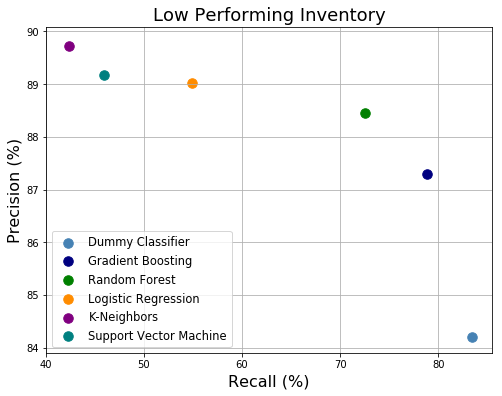

In [5]:
# Low Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.84196547*100, 0.83421053*100]
ml['Gradient Boosting']      = [0.87303023*100, 0.78884306*100]
ml['Random Forest']          = [0.88455019*100, 0.72500491*100]
ml['Logistic Regression']    = [0.89019844*100, 0.54881163*100]
ml['K-Neighbors']            = [0.89732221*100, 0.42427814*100]
ml['Support Vector Machine'] = [0.89167722*100, 0.45983107*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('Low Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)

plt.legend(prop={'size': 11.5})

display(precision_recall)

In the above plot, random forest and gradient boosting decision trees peform the best but we do not care to model the low performing inventory as best we can. It is better to chose a machine learning algorithm the performance better for high and moderate performing inventory.

### Moderate Performing Inventory

,Precision,Recall
Dummy Classifier,7.792208,8.823529
Gradient Boosting,12.318290,23.290598
Random Forest,14.509166,36.324786
Logistic Regression,12.350660,40.811966
K-Neighbors,10.427687,46.367521
Support Vector Machine,11.433255,42.948718


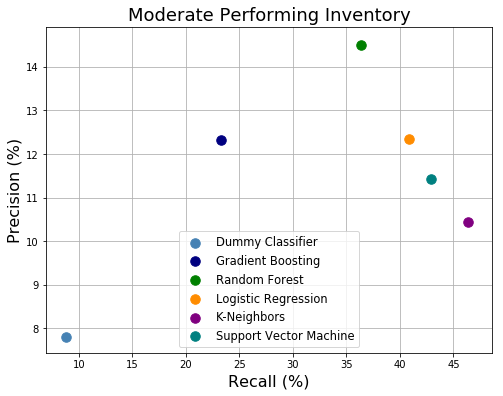

In [6]:
# Moderate Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.07792208*100, 0.08823529*100]
ml['Gradient Boosting']      = [0.1231829*100,  0.23290598*100]
ml['Random Forest']          = [0.14509166*100, 0.36324786*100]
ml['Logistic Regression']    = [0.1235066*100,  0.40811966*100]
ml['K-Neighbors']            = [0.10427687*100, 0.46367521*100]
ml['Support Vector Machine'] = [0.11433255*100, 0.42948718*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)

plt.legend(prop={'size': 11.5}, loc=8)

display(precision_recall)

In the above plot, both random forest and logistic regression perform the best for moderately performing inventory. For now these are our best candidates.

### High Performing Inventory

,Precision,Recall
Dummy Classifier,4.697987,4.575163
Gradient Boosting,22.743540,26.114650
Random Forest,23.099078,33.333333
Logistic Regression,17.903869,51.167728
K-Neighbors,15.855865,51.804671
Support Vector Machine,15.914071,54.564756


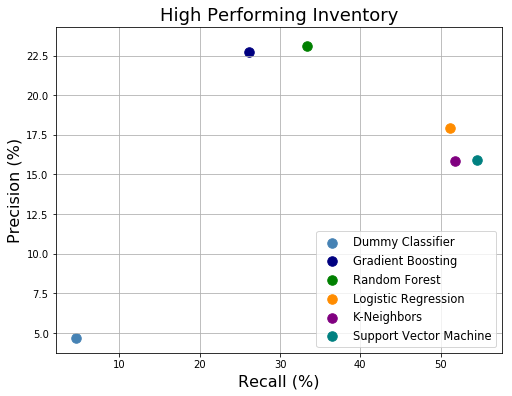

In [7]:
# High Performing

ml = OrderedDict()

ml['Dummy Classifier']       = [0.04697987*100, 0.04575163*100]
ml['Gradient Boosting']      = [0.2274354*100,  0.2611465*100]
ml['Random Forest']          = [0.23099078*100, 0.33333333*100]
ml['Logistic Regression']    = [0.17903869*100, 0.51167728*100]
ml['K-Neighbors']            = [0.15855865*100, 0.51804671*100]
ml['Support Vector Machine'] = [0.15914071*100, 0.54564756*100]


precision_recall = pd.DataFrame(data=list(ml.values()), 
                                index=ml.keys(),
                                columns=['Precision', 'Recall'])

fig, ax = plt.subplots()

colorlist = ['steelblue', 'navy', 'green', 'darkorange', 'purple', 'teal']

for i, l in enumerate(ml):
    precision_recall.iloc[[i]].plot(x='Recall', y='Precision', kind='scatter',
                                    figsize=(8, 6), ax=ax, s=90, label=l,
                                    color=colorlist[i], grid=True
                                   )


plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(prop={'size': 11.5}, loc=4)

display(precision_recall)

In this last plot, we can see that logistic regression out performs random forest. For this reason we select logistic regression as our final model. It has the best recall without sacrificing precision too much.

## Precision vs Recall

It will be beneficial to verify that the models are using the most optimal probability threshold to classify a sample as either a postive sample or negative sample.

### Logistic Regression

In [20]:
# Train model
log.fit(X_train, y_train);

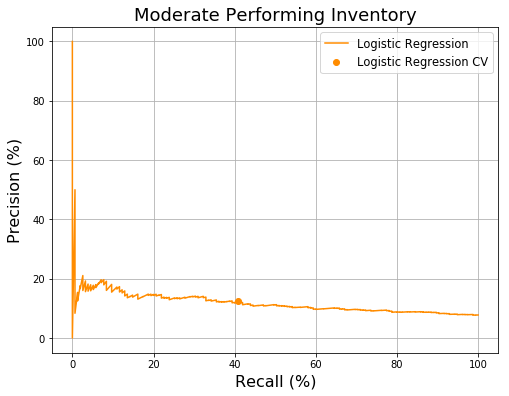

In [24]:
# Moderate Performing

pos_label = 1


precision, recall, thresholds = precision_recall_curve(y_test,
                   log.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='darkorange',
                      grid=True)

# cross-validated score
plt.plot(40.811966, 12.350660, 'o', color='darkorange')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Logistic Regression',
            'Logistic Regression CV'],
           prop={'size': 11.5}, loc=1);

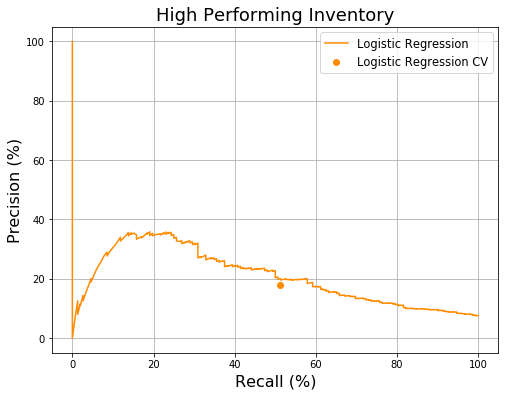

In [23]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   log.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='darkorange',
                      grid=True)

# cross-validated score
plt.plot(51.167728, 17.903869, 'o', color='darkorange')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Logistic Regression',
            'Logistic Regression CV'],
           prop={'size': 11.5}, loc=1);

Our cross-validated precision and recall values appear as dots on the figures. We can see that the probabilty thresholds chosen by the algorithm are quite good and do not need to be modified. We must keep in mind that the curves themselves are not cross-validated so they will have statistical fluctations making the cross-validated points not lie completely on the curve.

### Gradient Boosting Classifier

In [25]:
# Train model
gbc.fit(X_train, y_train);

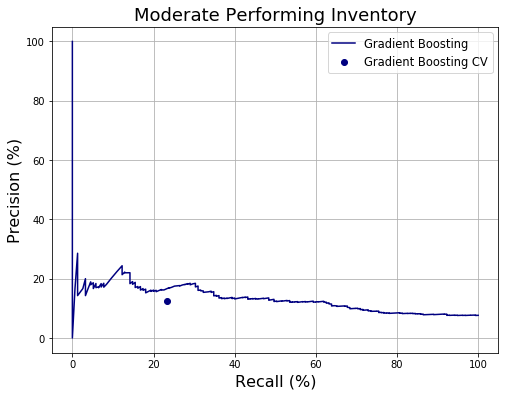

In [26]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   gbc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='navy',
                      grid=True)

# cross-validated score
plt.plot(23.290598, 12.318290, 'o', color='navy')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Gradient Boosting',
            'Gradient Boosting CV'],
           prop={'size': 11.5}, loc=1);

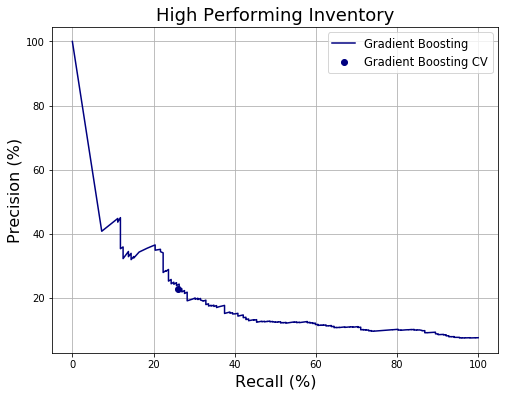

In [27]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   gbc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='navy',
                      grid=True)

# cross-validated score
plt.plot(26.114650, 22.743540, 'o', color='navy')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Gradient Boosting',
            'Gradient Boosting CV'],
           prop={'size': 11.5}, loc=1);

The cross-validate values for precision and recall also appears to show that the best probabiity threshold was chosen.

### Random Forrest Classifier

In [28]:
# Train model
rfc.fit(X_train, y_train);

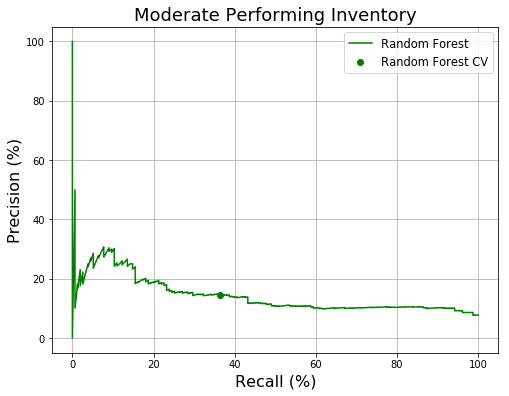

In [29]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   rfc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='green',
                      grid=True)

# cross-validated score
plt.plot(36.324786, 14.509166, 'o', color='green')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Random Forest',
            'Random Forest CV'],
           prop={'size': 11.5}, loc=1);

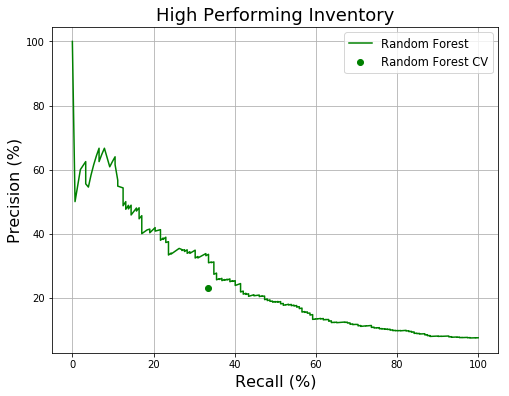

In [30]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   rfc.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='green',
                      grid=True)

# cross-validated score
plt.plot(33.333333, 23.099078, 'o', color='green')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Random Forest',
            'Random Forest CV'],
           prop={'size': 11.5}, loc=1);

The cross-validate values for precision and recall also appears to show that the best probabiity threshold was chosen.

### K-Neighbors Classifier

In [31]:
# Train model
knn.fit(X_train, y_train);

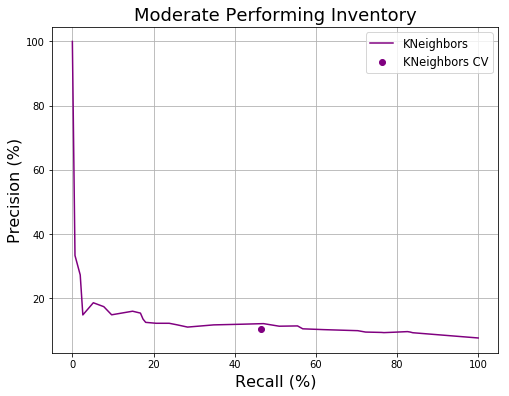

In [32]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   knn.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='purple',
                      grid=True)

# cross-validated score
plt.plot(46.367521, 10.427687, 'o', color='purple')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['KNeighbors',
            'KNeighbors CV'],
           prop={'size': 11.5}, loc=1);

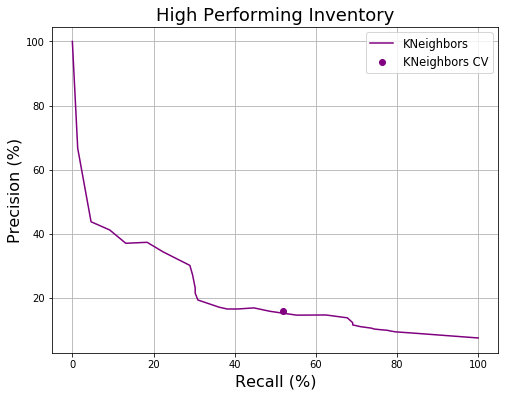

In [33]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   knn.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='purple',
                      grid=True)

# cross-validated score
plt.plot(51.804671, 15.855865, 'o', color='purple')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['KNeighbors',
            'KNeighbors CV'],
           prop={'size': 11.5}, loc=1);

The probability threshold chosen for k-neighbors classifier appears to be suboptimal but using another threshold value does not seem like it would make enough of a difference.

### Support Vector Machine Classifier

In [34]:
# Train model
svm.fit(X_train, y_train);

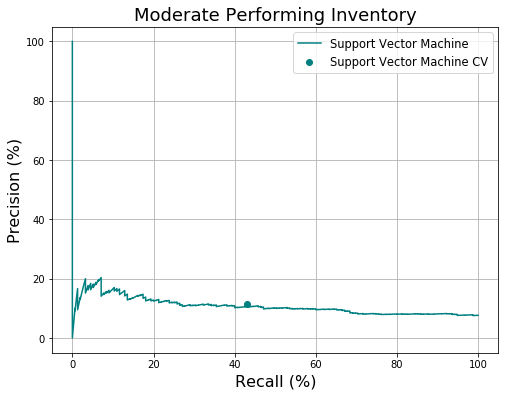

In [35]:
# Moderate Performing

pos_label = 1

precision, recall, thresholds = precision_recall_curve(y_test,
                   svm.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='teal',
                      grid=True)

# cross-validated score
plt.plot(42.948718, 11.433255, 'o', color='teal')

plt.title('Moderate Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Support Vector Machine',
            'Support Vector Machine CV'],
           prop={'size': 11.5}, loc=1);

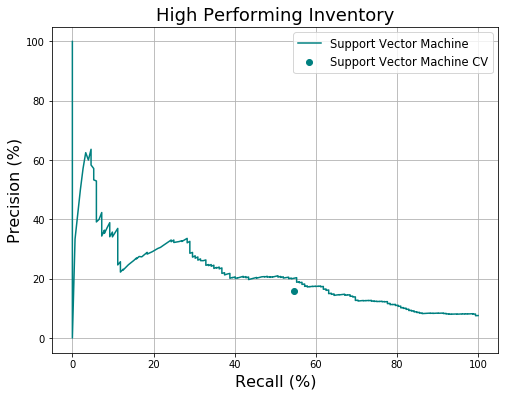

In [36]:
# High Performing

pos_label = 2

precision, recall, thresholds = precision_recall_curve(y_test,
                   svm.predict_proba(X_test)[:, pos_label],
                   pos_label=pos_label)

precision_recall = pd.DataFrame(data={'Precision': precision,
                                      'Recall': recall,
                                      'Threshold': np.append(thresholds, [1.0])})

precision_recall[['Precision', 'Recall']] = \
          precision_recall.apply(lambda df: df[['Precision', 'Recall']]*100, axis=1)

fig, ax = plt.subplots()

precision_recall.plot(x='Recall', y='Precision', kind='line',
                      figsize=(8, 6), ax=ax, color='teal',
                      grid=True)

# cross-validated score
plt.plot(54.564756, 15.914071, 'o', color='teal')

plt.title('High Performing Inventory', fontsize=18)

plt.xlabel('Recall (%)', fontsize=16)
plt.ylabel('Precision (%)', fontsize=16)


plt.legend(['Support Vector Machine',
            'Support Vector Machine CV'],
           prop={'size': 11.5}, loc=1);

The probability threshold chosen for support vector machine also appears to be suboptimal but using a different threshold value does not seem like it would make enough of a difference as well.

In conclusion, having studied the various precision vs recall plots we may be confident that the algorithm chose, for the the most part, a reasonable probability thresholds. This helps validate our cross-validated precision vs recall plots to use for our final model selection. Comparing the models also serves as a sanity check.

## Feature Importance

Now that we have settled on Logistic Regression with Ridge regularization as our model to evaluate inventory performance we can use it to extract insight about our data. Are there some brands more popular than others? Does rental price have an effect on rentability? Is there a mismatch between item sizes offered by lenders and those sizes demendad by renters? We will focus on answering these questions in this section.

In [125]:
# Store Logistic Regression coefficience in a pandas dataframe

log_coeff = pd.DataFrame(data=log.best_estimator_._final_estimator.coef_,
                         index=[0, 1, 2], columns=X_train.columns)

The coefficients of logistic regression are intrepretable. For example, for one unit of increase in the rental price of an time, we expect to see increase in the odds of being a high performing item over a low performing item, given by the expression,

$\Delta \textrm{odds} = e^{\textrm{ }\beta^\textrm{rental price}_\textrm{class 1} - \beta^\textrm{rental price}_\textrm{class 0}}$,

where $\beta^\textrm{rental price}_\textrm{class 1}$ is the coefficient of the rental price for class 1, and similarly for class 0.

### Moderate Performing Inventory against Low Performing Inventory

,1
rental price,0.672672
fausto puglisi,0.312893
brand_dolly 213,0.305399
brand_perfect d,0.287477
brand_maison margiela,0.281962


,1
size,-0.214713
rental price,0.672672


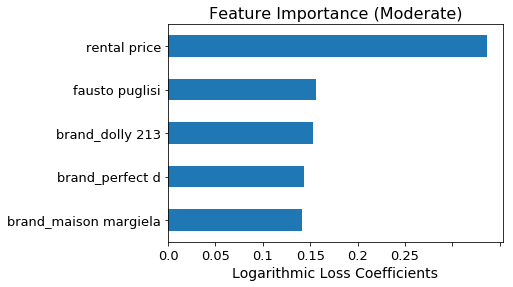

In [129]:
top_n = 5

pos_class = 1
reference_class = 0

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                               .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_fausto puglisi': 'fausto puglisi',
                              'brand_zimmermann': 'zimmermann',
                              'brand_naven': 'naven',
                              'brand_igigi': 'igigi', 
                              'rental_price': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

In [130]:
# In terms of Percentage change in odds

display(pd.DataFrame(k_class.head(top_n).apply(lambda beta: 100*(math.exp(beta)-1),
                                               axis=1), columns=['Change in Odds (%)']))

,Change in Odds (%)
rental price,95.946607
fausto puglisi,36.737495
brand_dolly 213,35.716609
brand_perfect d,33.305944
brand_maison margiela,32.572788


The increase in odds of being a moderate performing item for a unit of increase in rental price appears counterintuitive at first. We would expect that as the rental price increases that the item will be less likely to rent. But this is not the case. The reason being is that there is a suggested rental price between 15-20% of the retail price for newer items and 10-15% for older items and so lenders tend to set the price higher for more well known brands. This leads to an artificial dependency of the rental price on the brand name. Had this not been the case then the change in odds would have most likely reflected our intuition.

### High Performing Inventory against Low Performing Inventory

,2
for love & lemons,0.713311
rental price,0.605896
self-portrait,0.568069
zimmermann,0.346884
brand_frock and frill,0.343399


,2
size,-0.192686
rental price,0.605896


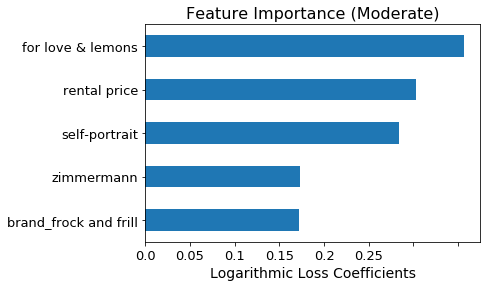

In [128]:
top_n = 5

pos_class = 2
reference_class = 0

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                               .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_for love & lemons': 'for love & lemons',
                              'brand_self-portrait': 'self-portrait',
                              'brand_zimmermann': 'zimmermann',
                              'brand_coach': 'coach', 
                              'rental_price': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

In [123]:
# In terms of Percentage change in odds

display(pd.DataFrame(k_class.head(top_n).apply(lambda beta: 100*(math.exp(beta)-1), axis=1), columns=[1]))

,1
for love & lemons,104.073624
rental price,83.289371
self-portrait,76.485558
zimmermann,41.465295
brand_frock and frill,40.973177


The model is again trying to suggest that the lender increase the rental price so that it has a higher chance of being a high peforming inventory item than a low performing inventory item, wich goes against intuition. Basically, rental price is not being as powerful predictor for rentability as we would have hoped.

We are also starting to see which brand names are popular in the moderate and high performing inventory category.

### High Performing Inventory against Moderately Performing Inventory

Another interesting option to consider is what the model has to say about high performing items against moderately peforming items. This will allow us to understand slight subtlities in their differences.

,2
self-portrait,1.152757
for love & lemons,0.757313
lovers + friends,0.537342
katya lee,0.414952
brand_needle & thread,0.411570


,2
size,0.022027
rental price,-0.066776


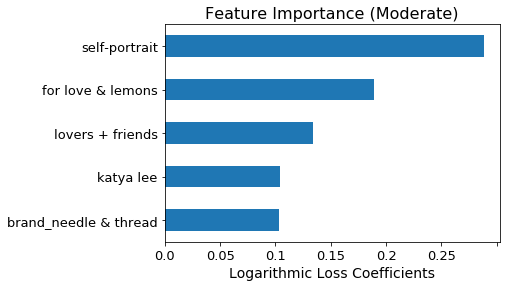

In [131]:
top_n = 5

pos_class = 2
reference_class = 1

pos_class_log = log_coeff.iloc[[pos_class]]

reference_class_log = log_coeff.iloc[[reference_class]]\
                               .rename(index={reference_class: pos_class})

k_class_log = (pos_class_log - reference_class_log)\
              .sort_values(by=[pos_class], axis=1,
                           ascending=False).transpose()

k_class = k_class_log.rename({'brand_self-portrait': 'self-portrait',
                              'brand_for love & lemons': 'for love & lemons',
                              'brand_lovers + friends': 'lovers + friends',
                              'brand_katya lee': 'katya lee', 
                              'brand_jill stuart': 'jill stuart',
                              'rental_price': 'rental price'})

ax = k_class.head(top_n).plot(kind='barh')

plt.title('Feature Importance (Moderate)', fontsize=16)

plt.xlabel('Logarithmic Loss Coefficients', fontsize=14)

plt.gca().invert_yaxis()

rng = [float(x)/100 for x in range(0, 30, 5)]

ax.set_xticklabels(rng, rotation=0, fontsize=13)
ax.set_yticklabels(k_class.index, rotation=0, fontsize=13)

ax.legend_.remove()

display(k_class.head(top_n))

display(k_class.loc[['size', 'rental price'], :])

We finally have an instance of the regression coefficient for rental price being negative. This indicates that if we were to reduce the rental price of these items they would have a greater odd of being a high performing item than a moderatly performing item which conforms to our intituition. 

One last observations to make is that there isn't a significant mismatch between item sizes offered by lenders and those sizes renters are interested in. In all is cases the magnitude of the regression coefficient for item size was rather small indicating that it does not offer serious predicitve power but on the bright size this means that there is a good renter experience.

## Log Loss

The hyper-parameters for all models were cross-validated using the log loss function. Here we plot their values to visually inspect how well they perform against each other. The larger the log loss value the worse the model is performing.

,log loss
Dummy Classifier,9.450909
Gradient Boosting,0.720873
Random Forest,0.838018
Logistic Regression,1.062011
KNeighbors,2.303290
Support Vector Machine,1.007302


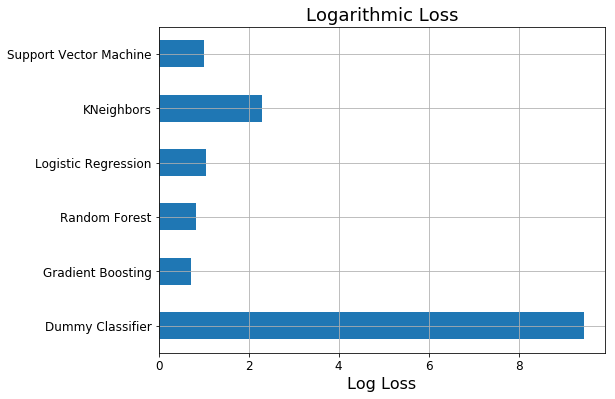

In [69]:
ml = OrderedDict()

# Log loss scores
ml['Dummy Classifier']       = 9.45090896378153
ml['Gradient Boosting']      = 0.7208726039328565
ml['Random Forest']          = 0.8380180430141219
ml['Logistic Regression']    = 1.062011157653542
ml['KNeighbors']             = 2.3032902858403044
ml['Support Vector Machine'] = 1.007301550578533


logloss = pd.DataFrame(data=list(ml.values()), index=ml.keys(), 
                       columns=['log loss'])

ax = logloss.plot(kind='barh', figsize=(8, 6), grid=True)

plt.title('Logarithmic Loss', fontsize=18)

plt.xlabel('Log Loss', fontsize=16)

ax.set_xticklabels(list(range(0, 12, 2)), rotation=0, fontsize=12)
ax.set_yticklabels(ml.keys(), rotation=0, fontsize=12)

ax.legend_.remove()

display(logloss)

Random guessing (i.e. Dummy classifier) clearly performs poorly while Logistic regression, Random forrest, Gradient boosting decision trees, and Support vector machine all perform relatively the same. As for the k-neighbors classifier, it does better than random guessing but certainly not as well as the other models.

## Summary

We have explored a few years worth of inventory data and attempted to model their rentability in order to help lenders understand what items to make available to other people. Logistic regression had the best performance for identifying high and moderate performing items by having a high recall value without needing to sacrafice precision too much. All models had relatively low precision but we should not be overly concerned about this since unintentially allowing lenders to share items that may not perform as well as they hope will not cause the client company to incur any monetary loss. The consequences are that there may be more lower performing items than what is ideal but overall the fashion catalog should decidely improve with those items that renters desire. Going forward the fashion company can use the model to construct a recommendation system for lenders to guide them to share better peforming apparel. 